<a href="https://colab.research.google.com/github/BartBennett/SimStudent/blob/main/MM1%20class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#system state
number_in_the_system = np.zeros(1)

#entity attributes
customer_ID = 0
arrival_time = []
service_time = []
departure_time = []

#resource
person_served = -1
server_idle = 0 
last_departure = 0

#events
class event:
    def __init__ (self, sim_time, event_type, customer_ID):
        self.sim_time = sim_time
        self.event_type = event_type
        self.customer_ID = customer_ID

event_queue = []
event_queue = np.append(event_queue, event(np.random.exponential(3.0), "Arrival", 0))

#sets
queue = []

#timing
max_time = 2000
sim_time = np.zeros(1)

while event_queue[0].sim_time <= max_time:
    sim_time = np.append(sim_time, event_queue[0].sim_time)
    if event_queue[0].event_type == "Arrival":
        number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]+1)
        customer_ID += 1
        arrival_time = np.append(arrival_time, sim_time[-1])
        event_queue.append(event(sim_time[-1]+np.random.exponential(3.0),"Arrival", event_queue[0].customer_ID+1))
        if number_in_the_system[-1] == 1:
            print("Time: ", sim_time[-1], " Arrival with immediate service: ", customer_ID)
            person_served = customer_ID
            service_time = np.append(service_time, sim_time[-1])
            server_idle += sim_time[-1] - last_departure
            event_queue.append(event(sim_time[-1] + np.random.exponential(2.0), "Departure",person_served))
        else:
            print("Time: ", sim_time[-1], " Arrival waiting in queue: ", customer_ID)
            queue = np.append(queue, customer_ID)
    else:   
        number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]-1)
        departure_time = np.append(departure_time, sim_time[-1])
        if number_in_the_system[-1] != 0:
            print("Time: ", sim_time[-1], " Departure: ", person_served, " Serving: ", queue[0])
            person_served = queue[0]
            queue = np.delete(queue, 0)
            service_time = np.append(service_time, sim_time[-1])
            event_queue.append(event(sim_time[-1] + np.random.exponential(2.0), "Departure",person_served))
        else:
            print("Time: ", sim_time[-1], " Departure: ", person_served, " system empty")
            person_served = -1
            last_departure = sim_time[-1]
            next_departure = max_time + 1
    del event_queue[0]
    event_queue.sort(key = lambda x: x.sim_time)

print("L = ",sum(departure_time - arrival_time[:len(departure_time)])/departure_time[-1])
print("Lq = ",sum(service_time - arrival_time[:len(service_time)])/service_time[-1])
print("W = ",sum(departure_time - arrival_time[:len(departure_time)])/len(departure_time))
print("Wq = ",sum(service_time - arrival_time[:len(service_time)])/len(service_time))
print("rho = ", 1 - server_idle/max_time)

AttributeError: ignored

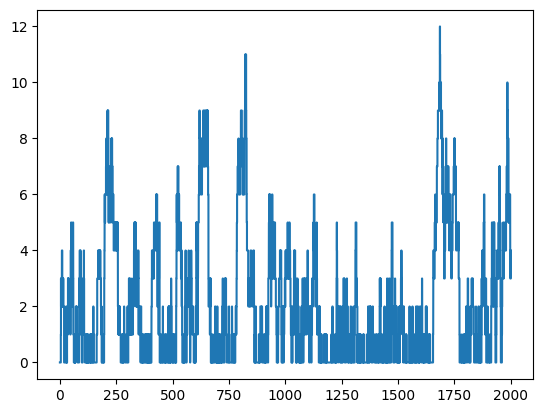

In [ ]:
plt.step(sim_time,number_in_the_system, where='post', label='system')
plt.show()